In [1]:
from OLS.OLS import * 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

plt.style.use('ggplot')

## Import data for EDA

Import Boston dataset with the next attributes columns:

1. *CRIM*      per capita crime rate by town
2. *ZN*        proportion of residential land zoned for lots over  25,000 sq.ft.
3. *INDUS*     proportion of non-retail business acres per town
4. *CHAS*      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. *NOX*       nitric oxides concentration (parts per 10 million)
6. *RM*        average number of rooms per dwelling
7. *AGE*       proportion of owner-occupied units built prior to 1940
8. *DIS*       weighted distances to five Boston employment centres
9. *RAD*       index of accessibility to radial highways
10. *TAX*      full-value property-tax rate per \$10000
11. *PTRATIO*  pupil-teacher ratio by town
12. *BRATIO*        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. *LSTAT*    % lower status of the population
14. *MEDV*     Median value of owner-occupied homes in \$1000's


In [2]:
dataset_name = 'housing.data'
dataset_columns = ['CR', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BRATIO', 'LSTAT', 'MEDV']

dataset = pd.read_csv('housing.data', 
                      delim_whitespace=True, 
                      header=None, 
                      names=dataset_columns)

### Dataset analysis

Perform simple dataset analysis on correlation, atd.

In [3]:
dataset.shape

(506, 14)

In [4]:
dataset.head()

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
dataset.tail()

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [6]:
dataset.describe()

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
def colorCorrelatedFeatures(value):
    """
    Color higly correlated pairs of features
    """
    color = 'green' if abs(value) > 0.74 and abs(value) != 1 else 'white'
    return 'background-color: %s' % color
    

dataset.corr().style.applymap(colorCorrelatedFeatures)

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV
CR,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Let's investigate mostly correlated features

I will plot them as scatter plots to see the next points:

1. Mostly correlated parts of the graph
2. Possible outliers of the 4 plots
3. The necessity of scaling some axes

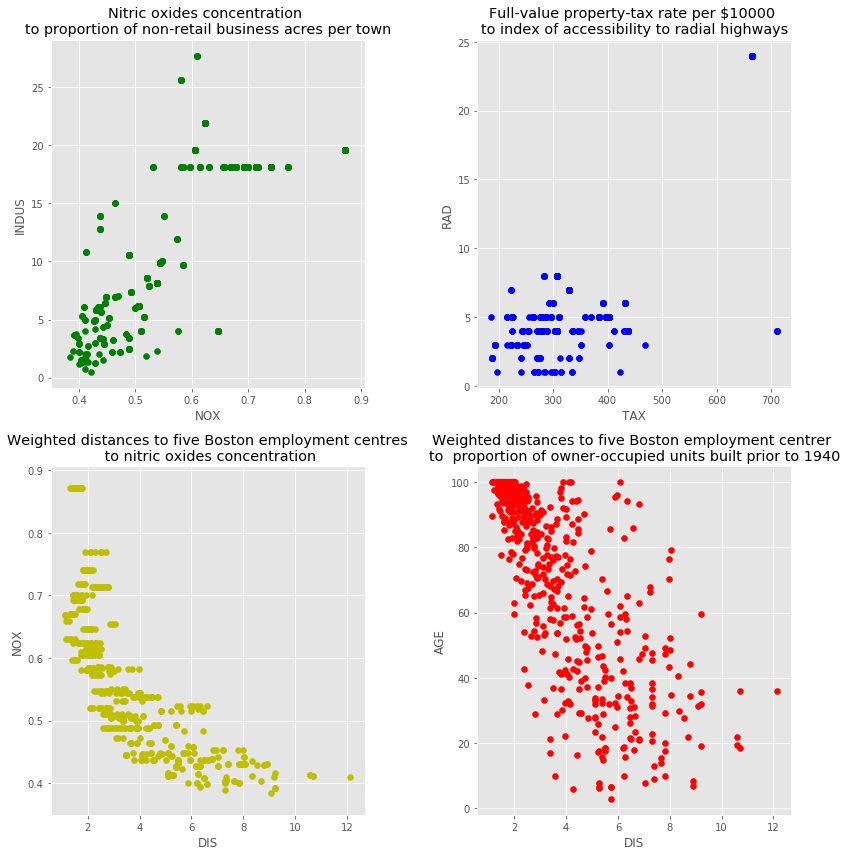

In [8]:
def plot(axis, x_feature, y_feature, x_label, y_label, color, description):
    """
    Plots scatter plot with the specified parameters
    """
    axis.scatter(x_feature, y_feature, c=color)
    axis.set_title(description)
    axis.set_xlabel(x_label)
    axis.set_ylabel(y_label)

def plotFeatures():
    
    figure, (axis1, axis2) = plt.subplots(2, 2, figsize = (12, 12))

    description = "Nitric oxides concentration \nto proportion of non-retail business acres per town"
    plot(axis1[0], dataset['NOX'], dataset['INDUS'], 'NOX', 'INDUS', 'g', description)

    description = "Weighted distances to five Boston employment centres\n to nitric oxides concentration"
    plot(axis2[0], dataset['DIS'], dataset['NOX'], 'DIS', 'NOX', 'y', description)

    description = "Full-value property-tax rate per $10000 \nto index of accessibility to radial highways"
    plot(axis1[1], dataset['TAX'], dataset['RAD'], 'TAX', 'RAD', 'b', description)
    
    description = "Weighted distances to five Boston employment centrer \nto  proportion of owner-occupied units built prior to 1940"
    plot(axis2[1], dataset['DIS'], dataset['AGE'], 'DIS', 'AGE', 'r', description)
    
    figure.tight_layout()
    
    plt.show()

plotFeatures()

In [9]:
def normalize(series: pd.Series) -> pd.Series:
    """
    Basic min-max normalization
    """
    return(series - series.min()) / (series.max() - series.min())

def filter_max(series: pd.Series, maximum_value):
    """
    Replaces outliers with the mean value
    """
    mean = series.mean()
    return series.apply(lambda x: x if x < maximum_value else mean)
    

Here we see that the mostly data is not clean and need some preparation:

### Plot NOX to INDUS:
As I see NOX is the percentage in range from 0 to 1, but mostly features as in range from 0 to 0.7, so remove outliers and normalise INDUS column

In [10]:
dataset['NOX'] = filter_max(dataset['NOX'], 0.7)
dataset['INDUS'] = filter_max(dataset['INDUS'], 15)
dataset['INDUS'] = normalize(dataset['INDUS'])

### Plot NOX to the DIS
Here we can try to normalize dis feature

In [11]:
dataset['DIS'] = normalize(dataset['DIS'])

### Plot RAD to TAX
Perform only basic min-max normalization, as removing outliers has shown a decrease in the high correlation between two features

In [12]:
dataset['TAX'] = normalize(dataset['TAX'])
dataset['RAD'] = normalize(dataset['RAD'])

### Plot AGE to DIS
1. Age is the proportion from 0 to 100, so normalize to range 0 to 1
2. Dis also can be normalised to the range 0 to 1

In [13]:
dataset['DIS'] = filter_max(dataset['DIS'], 0.8)
dataset['AGE'] = normalize(dataset['AGE'])

## Let's see the results 

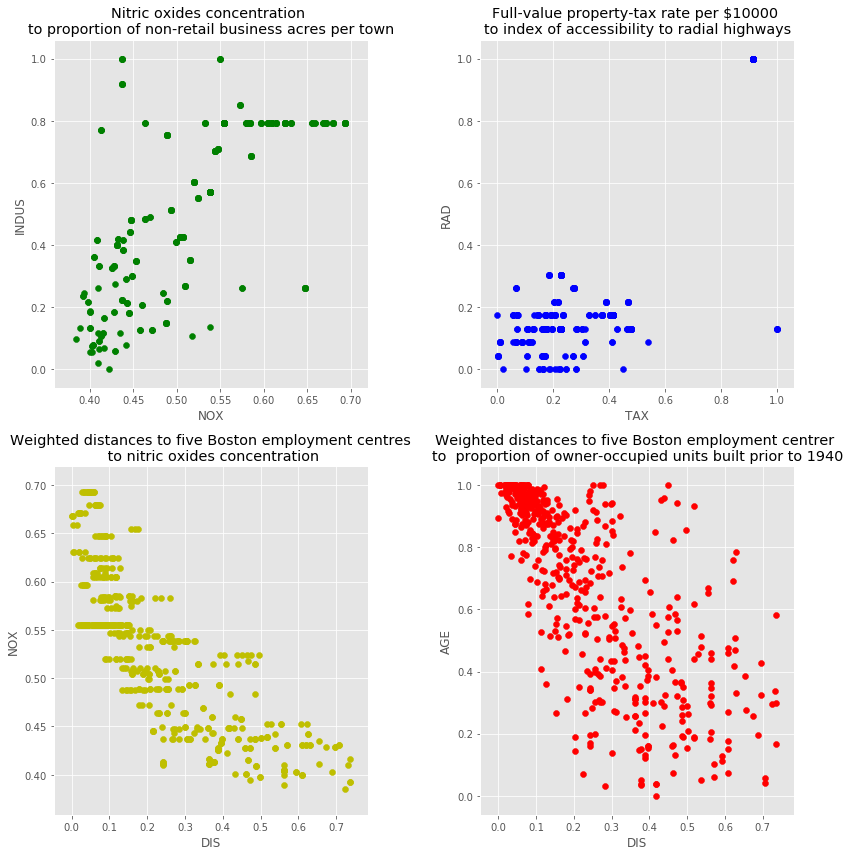

In [14]:
plotFeatures()

In [15]:
dataset.corr().style.applymap(colorCorrelatedFeatures)

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV
CR,1.000000,-0.200469,0.352188,-0.055892,0.495886,-0.219247,0.352734,-0.389057,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.643928,-0.042697,-0.584280,0.311991,-0.569537,0.609746,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.352188,-0.643928,1.000000,0.105238,0.648586,-0.428583,0.572571,-0.644311,0.529890,0.613338,0.420531,-0.301809,0.567246,-0.505093
CHAS,-0.055892,-0.042697,0.105238,1.000000,0.007674,0.091251,0.086518,-0.095748,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.495886,-0.584280,0.648586,0.007674,1.000000,-0.249425,0.752257,-0.810125,0.570451,0.622758,0.306780,-0.312849,0.554189,-0.360033
RM,-0.219247,0.311991,-0.428583,0.091251,-0.249425,1.000000,-0.240265,0.223468,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.572571,0.086518,0.752257,-0.240265,1.000000,-0.742399,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.389057,0.609746,-0.644311,-0.095748,-0.810125,0.223468,-0.742399,1.000000,-0.504218,-0.551729,-0.262901,0.300363,-0.496330,0.265375
RAD,0.625505,-0.311948,0.529890,-0.007368,0.570451,-0.209847,0.456022,-0.504218,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.613338,-0.035587,0.622758,-0.292048,0.506456,-0.551729,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [16]:
dataset.head()

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV
0,0.00632,18.0,0.137444,0,0.538,6.575,0.641607,0.269203,0.000000,0.208015,15.3,396.90,4.98,24.0
1,0.02731,0.0,0.491085,0,0.469,6.421,0.782698,0.348962,0.043478,0.104962,17.8,396.90,9.14,21.6
2,0.02729,0.0,0.491085,0,0.469,7.185,0.599382,0.348962,0.043478,0.104962,17.8,392.83,4.03,34.7
3,0.03237,0.0,0.127786,0,0.458,6.998,0.441813,0.448545,0.086957,0.066794,18.7,394.63,2.94,33.4
4,0.06905,0.0,0.127786,0,0.458,7.147,0.528321,0.448545,0.086957,0.066794,18.7,396.90,5.33,36.2


### OLS

Let's try to perform basic linear regression on the current features. 
OLS module supports different configurations and different regressions:

1. Basic linear regression, which is stastically calculated, using matrix operations
2. Gradient descent and its specifications, like (SGD and minibatch GD)

In [17]:
train_data = dataset.sample(frac = 0.8)
test_data = dataset.drop(train_data.index)

### Linear regression predictions

Perform basic statistical linear regression

In [18]:
def create_linear_model(train_data, labels, target) -> OLS:
    """
    Create linear regression model and perform fit
    
    Input:
        labels - the list of the labels from the dataset
        targets - the name of the target from the dataset
    
    """
    model = OLS()
    model.fit(
        np.array(train_data[labels]), 
        np.array(train_data[[target]])
    )
    return model

def render_plot(axis, dataset: pd.DataFrame, prediction, 
                label: str, target: str, split: str):
    """
        Renders plot on the matplotlib.axis
        
        Input:
            axis - axis to draw on
            dataset - train and test datasets
            prediction - vector of predictions
            label - feature label
            target - target label
            split - string, which shows, which split is it
    """
    
    color = (np.random.rand(), np.random.rand(), np.random.rand())
    
    axis.scatter(dataset[[label]], dataset[[target]], c=[color])
    
    axis.set_title("Regression result between {} and {} ({})".format(label, target, split))
    axis.set_xlabel(label)
    axis.set_ylabel(target)
    
    axis.plot(
        dataset[[label]], 
        prediction,
        c = 'r'
    )

def visualize_linear_reg_result(model: OLS, train_data, label, target):
    """
    Draw a scatter plot with the prediction line:
    
    Input:
        label - the name of the label from the dataset
        target - the name of the target from the dataset
    """
    
    slopes = model.slopes
    
    prediction = model.predict(np.array(train_data[[label]]))
    print("Train data score: ", model.score(np.array(train_data[[target]]), prediction))
    
    figure, (axis1, axis2) = plt.subplots(1, 2, figsize = (12, 6))
    
    render_plot(axis1, train_data, prediction, label, target, 'train_data')

    prediction = model.predict(np.array(test_data[[label]]))
    print("Test data score: ", model.score(np.array(test_data[[target]]), prediction))
    
    render_plot(axis2, test_data, prediction, label, target, 'test_data')
    
    figure.tight_layout()
    
    plt.show()

Train data score:  0.0378093409219871
Test data score:  0.03744452019915418


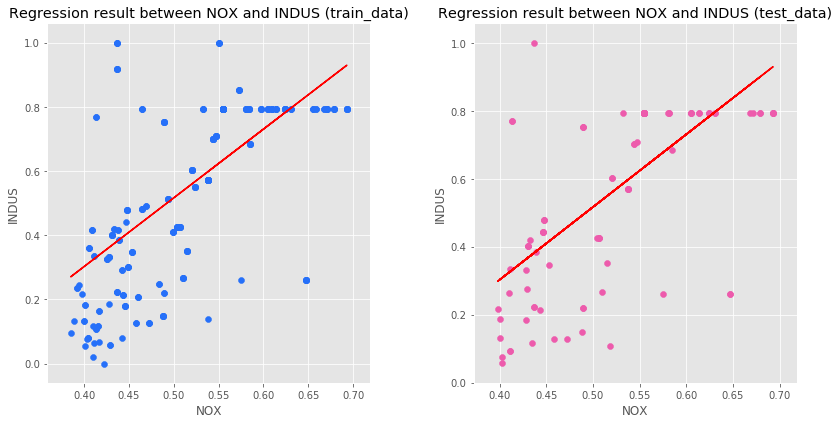

In [19]:
linear_model = create_linear_model(train_data, ['NOX'], 'INDUS')
visualize_linear_reg_result(linear_model, train_data, 'NOX', 'INDUS')

Train data score:  0.0020615135455313927
Test data score:  0.0022748765947096356


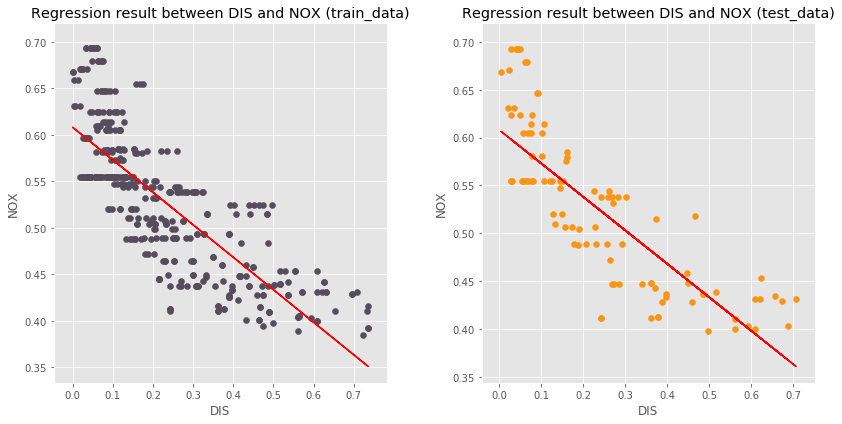

In [20]:
linear_model = create_linear_model(train_data, ['DIS'], 'NOX')
visualize_linear_reg_result(linear_model, train_data, 'DIS', 'NOX')

Train data score:  0.018687890451191777
Test data score:  0.013770917507744488


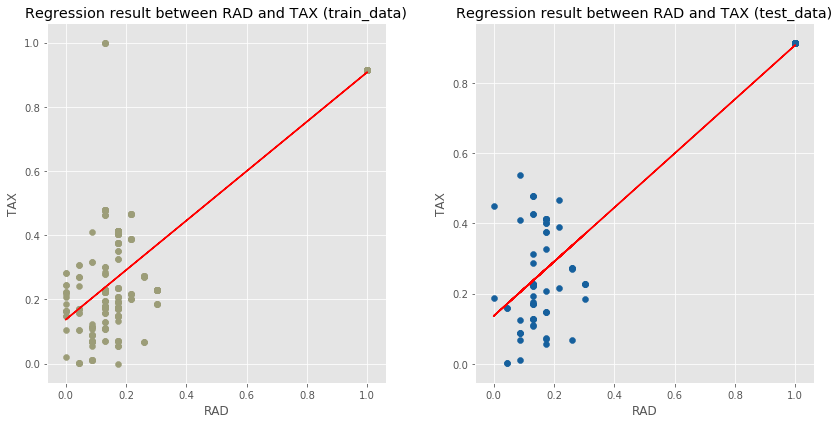

In [21]:
linear_model = create_linear_model(train_data, ['RAD'], 'TAX')
visualize_linear_reg_result(linear_model, train_data, 'RAD', 'TAX')

Train data score:  0.03821793177421743
Test data score:  0.035454864217143604


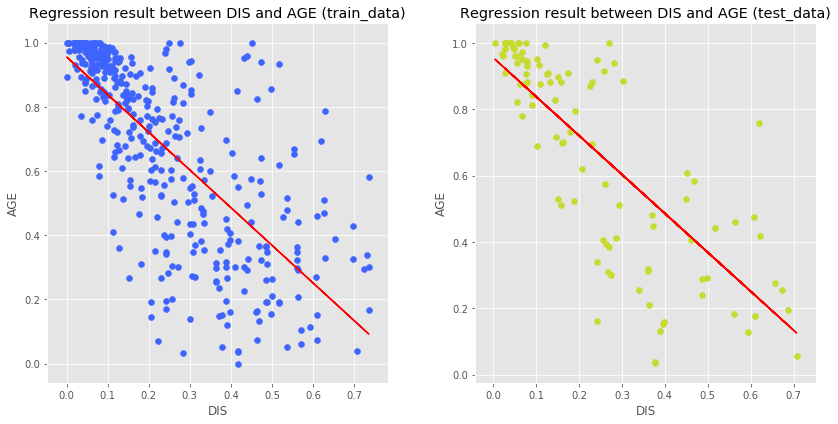

In [22]:
linear_model = create_linear_model(train_data, ['DIS'], 'AGE')
visualize_linear_reg_result(linear_model, train_data, 'DIS', 'AGE')